# Лабораторна робота 7

## Завдання 1

Діедральна група $D_{20}$ має ряд нормальних підгруп: 

In [1]:
G = DihedralGroup(20)
[N.order() for N in G.normal_subgroups()]

[40, 20, 20, 20, 10, 4, 2, 5, 1]

In [3]:
global DOMAIN, CODOMAIN
DOMAIN = DihedralGroup(20)
CODOMAIN = DihedralGroup(20)

def print_line(x="-"):
    print(f"-------------------------------{x}-------------------------------")

class NormalSubgroupChecker:
    
    def __init__(self, images, normal_subgroup) -> None:
        self.phi = PermutationGroupMorphism(DOMAIN, CODOMAIN, images)
        self.ker = self.phi.kernel()
        self.ns = normal_subgroup

    def __str__(self) -> str:
        return (
            f"{self.ker}\n"
            f"is {self.ker.structure_description()} equal to {self.ns.structure_description()}: {self.check_kernel_eq()}\n"
        )

    def check_kernel_eq(self) -> bool:
        return self.ker == self.ns

normal_subgroups = DOMAIN.normal_subgroups()
gens = DOMAIN.gens()

# D_20
print_line("D_20")
D_20 = NormalSubgroupChecker([CODOMAIN(()), CODOMAIN(())], normal_subgroups[0])
print(D_20)

# C_20
print_line("C_20")
C_20 = NormalSubgroupChecker([CODOMAIN(()), gens[1]], normal_subgroups[1])
print(C_20)

# D_10.1
print_line("D_10.1")
D_10_1 = NormalSubgroupChecker([gens[1], gens[1]], normal_subgroups[3])
print(D_10_1)

# D_10.2
print_line("D_10.2")
D_10_2 = NormalSubgroupChecker([gens[0]^10, CODOMAIN(())], normal_subgroups[2])
print(D_10_2)

# C_10
print_line("C_10")
C_10 = NormalSubgroupChecker([gens[0] ^ 10, gens[1]], normal_subgroups[4])
print(C_10)

# C_5
print_line("C_5")
C_5 = NormalSubgroupChecker([gens[0] ^ 15, gens[1] ^ 3], normal_subgroups[7])
print(C_5)

# C_4
print_line("C_4")
C_4 = NormalSubgroupChecker([gens[0] ^ 4, gens[0] ^ 9 * gens[1]], normal_subgroups[5])
print(C_4)

# C_2
print_line("C_2")
C_2 = NormalSubgroupChecker([gens[0] ^ 2, gens[1] ^ 3], normal_subgroups[6])
print(C_2)

# {e}
print_line("{e}")
e = NormalSubgroupChecker([gens[0], gens[1]], normal_subgroups[8])
print(e)


-------------------------------D_20-------------------------------
Subgroup generated by [(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20), (1,20)(2,19)(3,18)(4,17)(5,16)(6,15)(7,14)(8,13)(9,12)(10,11)] of (Dihedral group of order 40 as a permutation group)
is D20 equal to D20: True

-------------------------------C_20-------------------------------
Subgroup generated by [(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)] of (Dihedral group of order 40 as a permutation group)
is C20 equal to C20: True

-------------------------------D_10.1-------------------------------
Subgroup generated by [(2,20)(3,19)(4,18)(5,17)(6,16)(7,15)(8,14)(9,13)(10,12), (1,3,5,7,9,11,13,15,17,19)(2,4,6,8,10,12,14,16,18,20)] of (Dihedral group of order 40 as a permutation group)
is D10 equal to D10: True

-------------------------------D_10.2-------------------------------
Subgroup generated by [(1,20)(2,19)(3,18)(4,17)(5,16)(6,15)(7,14)(8,13)(9,12)(10,11), (1,3,5,7,9,11,13,15,17,19)(2,4,6,8,10,12,14,

Для кожної нормальної підгрупи $N$ побудуйте ендоморфізм $\phi : D_{20} \rightarrow D_{20}$ такий, що $Ker \phi = N$. Задайте його через `PermutationGroupMorphism` і використайте метод `.kernel` як підтвердження. 

___Зауваження___: ядро має бути не __ізоморфне__ підгрупі, а __рівне__ їй.

## Завдання 2

Знайдіть центр та представників класів спряженості для груп $C_{11}, D_{13}, Q_{8}, SL(3, \mathbb{Z}_7)$. Виведіть кількість елементів в кожній групі, кількість класів спряженості та запишіть формулу для них. 

In [2]:
class Peremoga:
    
    FILE_NAME = "t02_output.txt"
    
    def __init__(self, group) -> None:
        self.group = group
        self.conj_classes = group.conjugacy_classes()
        self.center = self.group.center()

    # @staticmethod
    # def find_center_group(group) -> list:
    #     center = []
    #     for a in group:
    #         for b in group:
    #             if a * b != b * a:
    #                 break
    #         else:
    #             center.append(a)

    #     return center

    @staticmethod
    def line(x = "-") -> str:
        return f"----------------------{x}----------------------"

    def print_in_file(self):
        context = ""
        with open(self.FILE_NAME, "r") as file:
            context = file.read()
            
        with open(self.FILE_NAME, "w") as f:
            f.write(context + "\n")
            f.write(f"{self.group.structure_description()}: \n")
            f.write(self.line(f"{self.group.structure_description()} center") + "\n")
            f.write(f"{self.center}\n")
            f.write(self.line(f"{self.group.structure_description()} conjugacy classes") + "\n")
            f.write(f"{self.conj_classes}\n")
            f.write(f"Conjugacy clases order: {len(self.conj_classes)}\n")
            f.write(f"{self.group.structure_description()} order: {self.group.order()}")
            f.write("\n\n")
            
                    

D13 = DihedralGroup(13)
S = SL(3, GF(7))
Z11 = CyclicPermutationGroup(11)
Q8 = QuaternionGroup()

groups = [D13, Q8, Z11, S]

for group in groups:
    P = Peremoga(group)
    P.print_in_file()

## Завдання 3

1. Побудуйте граф гіперкуба $C_4$ і знайдіть його групу автоморфізмів. Розгляньте цю групу і її дію на граф. Покажіть орбіти цієї групової дії та зробіть висновки. 
2. Знайдіть стабілізатор довільної вершини та розгляньте його як групу з дією на весь граф. Знайдіть орбіти цієї нової групової дії. Зробіть висновки в термінах гіперкуба.

4-Cube
(('0000', '0011', '0101', '1001'), ('0001',), ('0010', '0100', '1000', '0111', '1011', '1101'), ('0110', '1010', '1100', '1111'), ('1110',))
(('0000', '0101', '1001', '0110', '1010', '1111'), ('0001', '0010', '0111', '1011'), ('0011',), ('0100', '1000', '1101', '1110'), ('1100',))


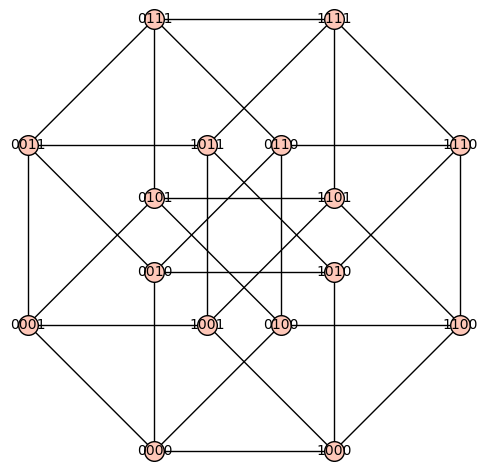

In [7]:
G = graphs.CubeGraph(4)
print(G)

automorph = G.automorphism_group() 
automorph.orbits()

st0001 = automorph.stabilizer('0001')
print(st0001.orbits())

st0011 = automorph.stabilizer('0011')
print(st0011.orbits())

G.plot()


## Завдання 4

1. Знайдіть прості графи з найменшою к-тю вершин, в яких групи автоморфізмів ізоморфні $A_2$ і $A_3$ відповідно. 
2. (додаткова) Зробіть те саме для $A_4$ i $A_5$. 

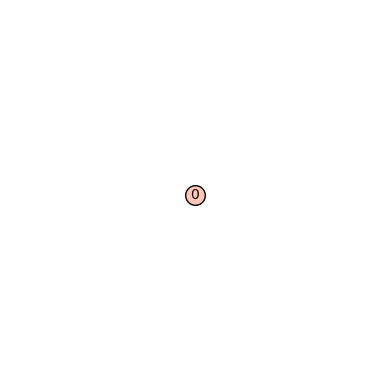

1
1


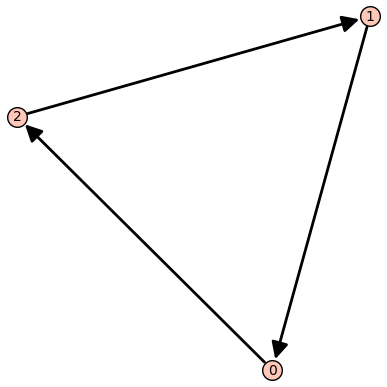

C3
1


In [96]:
### A_2:
G = graphs.CompleteGraph(1)
G.show()
automorph = G.automorphism_group()
print(automorph.structure_description())
print(AlternatingGroup(2).structure_description())


## A_3
G = DiGraph([(2, 1), (0, 2), (1, 0)])
G.show()
automorph = G.automorphism_group()
print(automorph.structure_description())
print(AlternatingGroup(2).structure_description())


Група автоморфізмів графа Graph on 6 vertices ізоморфна Alternating group of order 1!/2 as a permutation group
Група автоморфізмів графа Graph on 6 vertices ізоморфна Alternating group of order 2!/2 as a permutation group


## Завдання 5

Побудуйте простий граф, в якого група автоморфізмів тривіальна. 

Permutation Group with generators [()]


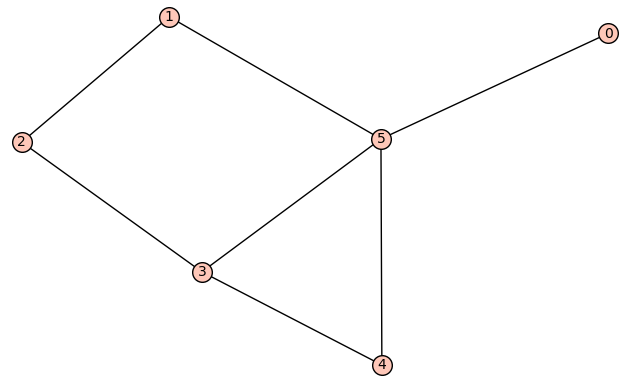

In [32]:
Gamma = Graph(6)

Gamma.add_edge(1,2)
Gamma.add_edge(2,3)
Gamma.add_edge(3,4)
Gamma.add_edge(4,5)

Gamma.add_edge(5,0)
Gamma.add_edge(5, 3)
Gamma.add_edge(5, 1)


automorph = Gamma.automorphism_group()
print(automorph)

Gamma.plot(layout="spring")


## Завдання 6

1. Побудуйте граф, як показано в коді нижче, і знайдіть його групу автоморфізмів. Розгляньте цю групу і її дію на граф. Покажіть орбіти цієї групової дії та зробіть висновки. 
2. Знайдіть стабілізатор довільної вершини та розгляньте його як групу з дією на весь граф. Знайдіть орбіти цієї нової групової дії. Зробіть висновки в термінах графа.

_Підказка_: намалюйте граф як планарний за допомогою `.plot(layout='planar')` для кращої наочності.

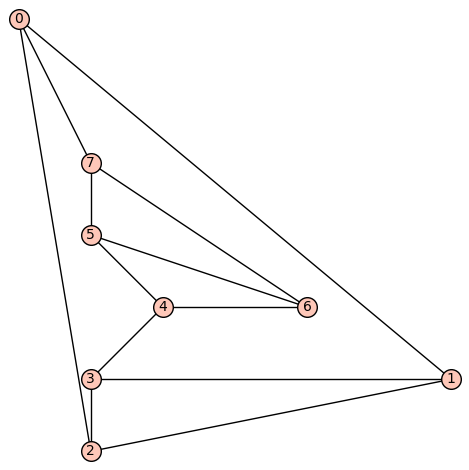

In [72]:
G = graphs.CycleGraph(8)
G.add_edges([(0, 2), (1, 3), (4, 6), (5, 7)])
G.plot(layout='planar')

In [84]:
automorph = G.automorphism_group()
print(automorph.orbits()) # автоморфізм може перевести вершину лише в 3 інші
Stab = automorph.stabilizer(0)
for s in Stab:
    print(f"---------------------")
    for v in [i for i in range(7)]:
        print(f"vertex {v} to {s(v)}")


((0, 3, 4, 7), (1, 2, 5, 6))
---------------------
vertex 0 to 0
vertex 1 to 1
vertex 2 to 2
vertex 3 to 3
vertex 4 to 4
vertex 5 to 5
vertex 6 to 6
---------------------
vertex 0 to 0
vertex 1 to 1
vertex 2 to 2
vertex 3 to 3
vertex 4 to 4
vertex 5 to 6
vertex 6 to 5
---------------------
vertex 0 to 0
vertex 1 to 2
vertex 2 to 1
vertex 3 to 3
vertex 4 to 4
vertex 5 to 5
vertex 6 to 6
---------------------
vertex 0 to 0
vertex 1 to 2
vertex 2 to 1
vertex 3 to 3
vertex 4 to 4
vertex 5 to 6
vertex 6 to 5
